# General graphs

In [13]:
from sklearn.datasets import load_digits, load_iris, load_wine, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import os, sys
import numpy as np
import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(src_path)
from classifiers.TriTrainingClassifier import TriTraining
from classifiers.CoForestClassifier import CoForest

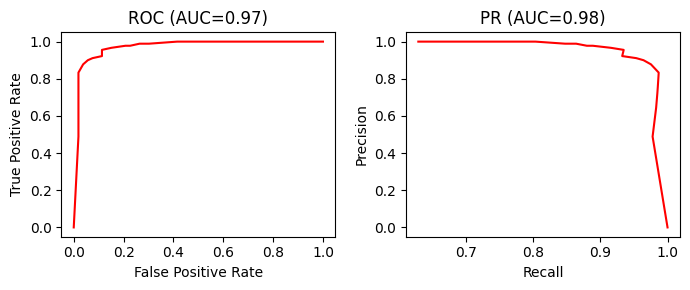

In [16]:
dataset = load_breast_cancer()

X = np.array(dataset.data)
y = np.array(dataset.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
L_train, U_train, Ly_train, Uy_train = train_test_split(X_train, y_train, test_size=0.8)
        
co_forest = CoForest(20, 0.75,'log2', 5)
co_forest.fit(L_train, Ly_train, U_train)

y_pred_proba = co_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

fig, axes = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True)

axes[0].plot(fpr, tpr, color='r')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_title('ROC (AUC={})'.format(round(auc(fpr, tpr),2)))

axes[1].plot(precision, recall, color='r')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title('PR (AUC={})'.format(round(auc(recall, precision),2)))


plt.show()